0.9997357911430298
2.9990026018582303
4.998463054653258
6.997581001278006
8.996254249569017


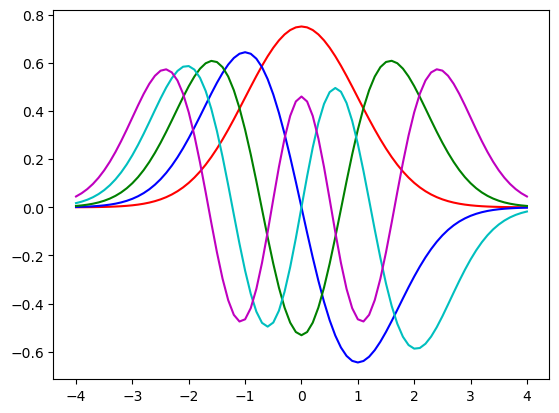

(81, 5)


In [109]:
###part a
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import RK45
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def shoot1(x, f, epsilon):
    return [f[1], (x ** 2 - epsilon ) * f[0]]

tol = 1e-4  # define a tolerance level 
col = ['r', 'b', 'g', 'c', 'm', 'k']  # eigenfunc colors

# def f0(epsilon):
#     return [1, np.sqrt(L**2-epsilon)]

#f0 = [1, np.sqrt(L**2-epsilon)]

n0 = 0.1; L = 4; xp = [-4, 4] 
xshoot =  np.arange(xp[0], xp[1] + 0.1 ,0.1)

epsilon_start = n0  # beginning value of epsilon

A1 = np.array([[]] * len(xshoot))
A2 = np.array([])

for modes in range(1, 6):  # begin mode loop
    epsilon = epsilon_start  # initial value of eigenvalue epsilon
    depsilon = n0   # default step size in epsilon
    for _ in range(1000):  # begin convergence loop for epsilon

        f0 = [1, np.sqrt(L**2-epsilon)]
        sol = solve_ivp(lambda x, f: shoot1(x, f, epsilon), [xshoot[0], xshoot[-1]], f0, t_eval=xshoot)
        y = sol.y.T
        
        if abs(y[-1, 0]* np.sqrt(L**2-epsilon) + y[-1,1] - 0 ) < tol:  # check for convergence
            print(epsilon)  # write out eigenvalue
            
            A2 = np.append(A2, np.array([epsilon]), axis=0)
            
            break  # get out of convergence loop

        if (-1) ** (modes + 1) * (y[-1, 0]* np.sqrt(L**2-epsilon) + y[-1,1]) > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2
    
    epsilon_start = epsilon + 0.1  # after finding eigenvalue, pick new start
    norm = np.trapz(y[:, 0] * y[:, 0], xshoot)  # calculate the normalization
    
    A1 = np.append(A1, abs(np.array([y[:,0]/ np.sqrt(norm)])).transpose(), axis=1)
    plt.plot(xshoot, y[:, 0] / np.sqrt(norm), col[modes - 1])  # plot modes



plt.show()  # end mode loop

np.save('A1.npy', A1)
np.save('A2.npy', A2)
print(A1.shape)


A4 [0.99937352+0.j 2.996839  +0.j 4.99140656+0.j 6.98038865+0.j
 8.95060003+0.j]


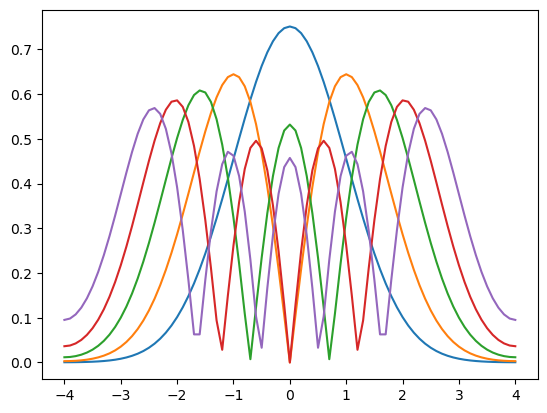

In [110]:
### part b
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig


A = np.zeros((79,79))
n0 = 0.1; L = 4; xp = [-3.9, 3.9] 
deltax = 0.1

## get x values
x =  np.arange(xp[0], xp[1] + 0.1 ,deltax)

## set up middle diagonal
for n in range (79):
        A[n,n] = - (2 + (x[n] ** 2) * (deltax ** 2) )
    
## set up off diagonals
for n in range (78):
    A[n, n+1] = 1
    A[n + 1, n] = 1

## set up boundary conditions
A[0,0] = 4/3 - 2 - (x[0] ** 2) * (deltax ** 2)
A[0,1] = 2/3

A [-1,-1] =  4/3 - 2 - (x[-1] ** 2) * (deltax ** 2)
A[-1,-2] = 2/3
## print(A)
np.savetxt('hw3_Amatrix.csv', A, fmt ='%s', delimiter=',')

## get eigenvalues by themselves
B = (A * -1)/ deltax **2

np.savetxt('hw3_Acopymatrix.csv', B, fmt ='%s', delimiter=',')


## get eigenvalues (D) and eigenfunction (V)
D,V = eig(B)

#print(V)
#print(D)
N = 79

sorted_indices = np.argsort(np.abs(D)) # Sort 
Dsort = D[sorted_indices]
Vsort = V[:, sorted_indices]

# Extract the first 5 smallest eigenvalues and corresponding eigenvectors

D5 = Dsort[:5]
V5 = Vsort[:, :5]

## get the first and last eigenfunction
phi_0 = np.array([(4/3 * V5[0,:]) - 1/3 * V5[1, :]])
phi_N = ([(4/3 * V5[-1,:]) - 1/3 * V5[-2, :]])

allphi = np.concatenate((phi_0, V5, phi_N), axis = 0)

A4 = D5
A3 = np.empty((81, 5))


col = ['r', 'b', 'g', 'c', 'm', 'k']  # eigenfunc colors

## normalize
xspan = np.arange(-4,4.1,0.1)
for j in range(5):
    normj = np.trapz(allphi[:, j]*allphi[:, j], xspan)
    #print(normj)
    A3[:, j] = abs(allphi[:, j] / np.sqrt(abs(normj)))
    
    plt.plot(xspan, A3[:,j])
# print (A3.shape)
print('A4', A4)

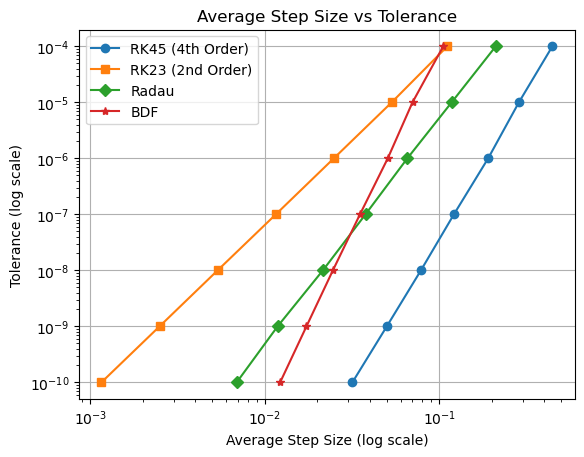

[5.24466756 3.01909953 4.03819927 6.45751261]
(4,)


In [125]:
### part d
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import RK45
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def shoot2(x, f):
    return [f[1], (x ** 2 - 1 ) * f[0]]

## itialize
n0 = 0.1; L = 2; xp = [-L, L] 
xshoot =  np.arange(xp[0], xp[1] + 0.1 ,0.1)

f0 = [1, np.sqrt(L**2-1)]

## check to make sure solve_ivp works and plots the right eigenfunction
# TOL = 10**-4
# options = {'rtol': TOL, 'atol': TOL}
# rk45 = solve_ivp(shoot2, [-2,2.1], f0, method='RK45', t_eval=xshoot, **options)
# norm = np.trapz(rk45.y[0] * rk45.y[ 0], rk45.t)  # calculate the normalization
    
# A1 = abs(np.array([rk45.y[0]/ np.sqrt(norm)])).transpose()
# plt.plot(xshoot, A1)    
# plt.show()  # end mode loop

### Initialize tolerances and create empty arrays for the average steps
TOL = np.array([1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10])

avg_steps_rk45 = []
avg_steps_rk23 = []
avg_steps_radau = []
avg_steps_bdf = []

for j in range (TOL.size):
    options = {'rtol': TOL[j], 'atol': TOL[j]}
    
    ### rk45
    rk45 = solve_ivp(shoot2, [-2,2], f0, method='RK45', **options)
    step_sizes_rk45 = np.diff(rk45.t)  # Calculate step sizes
    avg_steps_rk45.append(np.mean(step_sizes_rk45)) # Average step size

    ### rk23
    rk23 = solve_ivp(shoot2, [-2,2], f0, method='RK23', **options)
    step_sizes_rk23 = np.diff(rk23.t)  # Calculate step sizes
    avg_steps_rk23.append(np.mean(step_sizes_rk23))  # Average step size

    ### radau
    radau = solve_ivp(shoot2, [-2,2], f0, method='Radau', **options)
    step_sizes_radau = np.diff(radau.t)  # Calculate step sizes
    avg_steps_radau.append(np.mean(step_sizes_radau)) # Average step size

    ### bdf
    bdf = solve_ivp(shoot2, [-2,2], f0, method='BDF', **options)
    step_sizes_bdf = np.diff(bdf.t)  # Calculate step sizes
    avg_steps_bdf.append(np.mean(step_sizes_bdf))  # Average step size

## convert to np arrays
avg_steps_rk45 = np.array(avg_steps_rk45)
avg_steps_rk23 = np.array(avg_steps_rk23)
avg_steps_radau = np.array(avg_steps_radau)
avg_steps_bdf = np.array(avg_steps_bdf)

plt.loglog(avg_steps_rk45,TOL, marker='o', label='RK45 (4th Order)')
plt.loglog(avg_steps_rk23,TOL ,marker='s', label='RK23 (2nd Order)')
plt.loglog(avg_steps_radau,TOL, marker='D', label='Radau')
plt.loglog(avg_steps_bdf,TOL, marker='*', label='BDF')

plt.ylabel('Tolerance (log scale)')
plt.xlabel('Average Step Size (log scale)')
plt.title('Average Step Size vs Tolerance')
plt.grid()
plt.legend()
plt.show()

steps = np.array([avg_steps_rk45,avg_steps_rk23, avg_steps_radau, avg_steps_bdf])

A9 = np.zeros(steps.shape[0])
for j in range (steps.shape[0]):
    slope, intercept = np.polyfit(np.log(steps[j]), np.log(TOL), 1)
    A9[j] = slope
    
print(A9) 
print(A9.shape)
np.save('A9.npy', A9)

In [112]:
#### need to fix c, find out how to get eigenvalues in e

(5,)
(5,)
A10 [4.57692814e-08 1.72430946e-07 2.47861359e-07 4.35421341e-07
 1.96490935e-06]
A12 [2.33908579e-07 2.39720320e-06 1.81275996e-05 1.53048072e-04
 1.24238600e-03]
A11 [0.02642089 0.0332466  0.03073891 0.03455712 0.04161945]
A13 [0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]


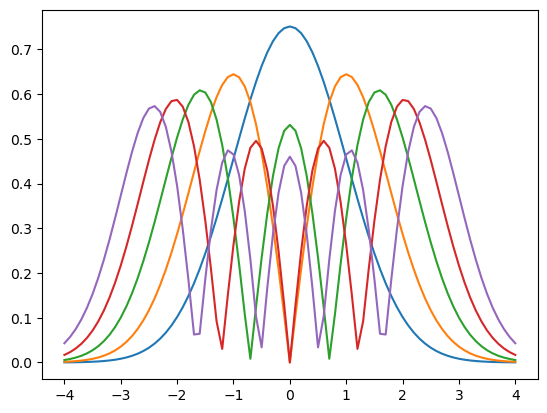

In [123]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import RK45
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import hermite

### part e
xspan = np.arange(-4,4.1,0.1)


### gauss_hermite equations
# def phi(x):
#     norm = np.pi ** -0.25
    
#     phi0 = norm * np.exp(-0.5 * x**2)  # H0(x)
#     phi1 = norm * np.sqrt(2) * x * np.exp(-0.5 * x**2)  # H1(x)
#     phi2 = norm * (np.sqrt(2) * (2 * x**2 - 1)) * np.exp(-0.5 * x**2)  # H2(x)
#     phi3 = norm * (np.sqrt(6) * (4 * x**3 - 3 * x)) * np.exp(-0.5 * x**2)  # H3(x)
#     phi4 = norm * (np.sqrt(24) * (8 * x**4 - 12 * x**2 + 3)) * np.exp(-0.5 * x**2)  # H4(x)
    
#     return [phi0, phi1, phi2, phi3, phi4]


def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result
    
def phi(x):
    # Normalization factor
    #norm = np.pi ** -0.25
    
    # Pre-calculate the Hermite polynomials
    phi_values = []
    
    for n in range(5):
        H_n = hermite(n)  # Get the n-th Hermite polynomial
        # Calculate the normalized function phi_n
        phi_n =  (H_n(x) * np.exp(-0.5 * x**2))/ np.sqrt(factorial(n) * (2**n) * np.sqrt(np.pi))
        phi_values.append(phi_n)
        
    return phi_values

### create matrix for exact gauss_hermite sol
gauss_hermite = np.zeros((xspan.size, 5))

for j in range (xspan.size):
    xnow = xspan[j]
    gauss_hermite[j] = phi(xnow)
    
GH = np.array (gauss_hermite)

# print(gauss_hermite.shape)
plt.plot(xspan, np.abs(gauss_hermite))    
# plt.show()

### normalize matrix, plot to make sure it looks right
# GH = np.zeros((xspan.size, 5))
# for j in range(5):
#     norm = np.trapz(gauss_hermite[:, j]*gauss_hermite[:, j], xspan)
#     #print(norm)
#     GH[:, j] = abs(gauss_hermite[:, j] / np.sqrt(norm))
    
#     plt.plot(xspan, GH[:,j])
    
## rows, cols
n, m = GH.shape

### initilize error matrices
a_error = np.zeros((n,m))
b_error = np.zeros((n,m))

A10 = np.zeros(m)
A12 = np.zeros(m)

#exact eigenvalues

exact_e = np.array([1,3,5,7,9])

print(exact_e.shape)

A11 = np.zeros(exact_e.shape)
A13 = np.zeros(exact_e.shape)

print(A13.shape)

### create error matrices, normalize and put into 5x1 vectors
for j in range (m):
    error_a = np.abs(A1[:,j]) - np.abs(GH[:,j])
    error_b = np.abs(A3[:,j]) - np.abs(GH[:,j])

    norm_a = np.trapz(error_a **2, xspan)
    norm_b = np.trapz(error_b**2, xspan)

    A10[j] = norm_a
    A12[j] = norm_b

    A11[j] = 100 * (np.abs(A2[j] - exact_e[j]) / exact_e[j])
    A13[j] = 100 * (np.abs(A4[j] - exact_e[j]) / exact_e[j])

#print(a_error)
print('A10', A10)
print('A12', A12)
print('A11', A11)
print('A13', A13)
# print(A10)
# print(A12)
# print(A10.shape)
# print(A12.shape)
np.save('A10.npy', A10)
np.save('A12.npy', A12)
np.save('A11.npy', A11)
np.save('A13.npy', A13)

A5 [[1.10632401e-01 3.42995987e-01]
 [1.31425452e-01 3.80308372e-01]
 [1.55620741e-01 4.20317753e-01]
 [1.83285244e-01 4.61688409e-01]
 [2.14395026e-01 5.02884359e-01]
 [2.48815413e-01 5.42261741e-01]
 [2.86300988e-01 5.78068810e-01]
 [3.26495596e-01 6.08445935e-01]
 [3.69025012e-01 6.31547722e-01]
 [4.13247276e-01 6.45555100e-01]
 [4.58248955e-01 6.48574054e-01]
 [5.03110823e-01 6.39164073e-01]
 [5.46908748e-01 6.16356304e-01]
 [5.88713689e-01 5.79653551e-01]
 [6.27591697e-01 5.29030280e-01]
 [6.62603917e-01 4.64985072e-01]
 [6.92806585e-01 3.88673754e-01]
 [7.17251030e-01 3.01714850e-01]
 [7.35085963e-01 2.06172940e-01]
 [7.45920093e-01 1.04560066e-01]
 [7.49523358e-01 1.64269229e-04]
 [7.45833671e-01 1.04717062e-01]
 [7.34963288e-01 2.06225201e-01]
 [7.17198809e-01 3.01773569e-01]
 [6.93001177e-01 3.88808918e-01]
 [6.63005676e-01 4.65218872e-01]
 [6.28021935e-01 5.29331931e-01]
 [5.89032820e-01 5.79940683e-01]
 [5.47101151e-01 6.16579292e-01]
 [5.03237672e-01 6.39353212e-01]
 [4.584

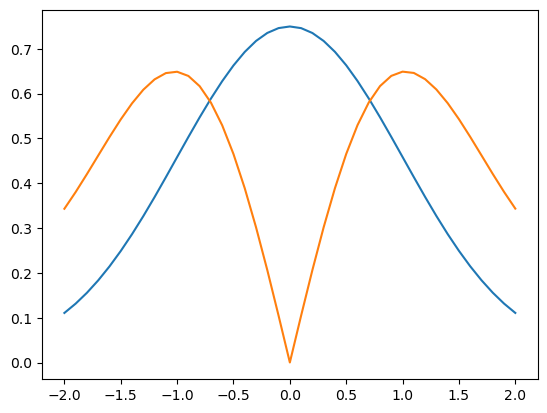

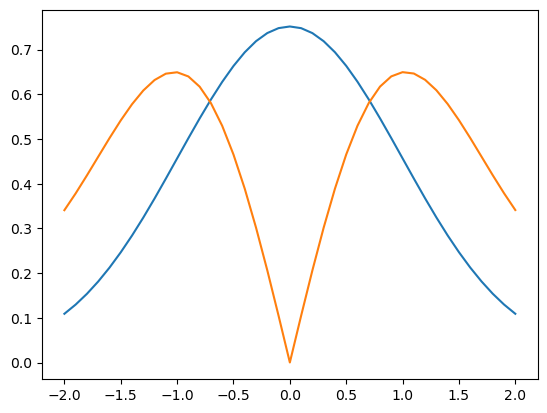

In [114]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import simpson
import matplotlib.pyplot as plt

def shoot2(x, f, epsilon, gamma):
    return [f[1], (gamma  * abs(f[0])**2 + x**2 - epsilon) * f[0]]

tol = 1e-6  # tolerance level
col = ['r', 'b']  # eigenfunction colors


dx = 0.1
L = 2
xp = [-L, L]
x = np.arange(xp[0], xp[1] + 0.1, 0.1)
n = len(x)


EsolCpos, EsolCneg = np.zeros(2), np.zeros(2)
ysolCpos, ysolCneg = np.zeros((n, 2)), np.zeros((n, 2))

 # initial value of epsilon

for gamma in [-0.05, 0.05]:
    epsilon_start = 0.1
    A = 0.1

    for modes in range(1, 3):  # begin mode loop
        dA = 0.01  # step size for A

        for a in range(1000):
            epsilon = epsilon_start  # initial epsilon
            depsilon = 0.2

            for _ in range(1000):  # convergence loop for epsilon
                f0 = [A, A * np.sqrt(L**2 - epsilon)]
                #print('A:', A, 'epsilon:', epsilon)

                # Solve the ODE
                sol = solve_ivp(lambda x, f: shoot2(x, f, epsilon, gamma),
                                [x[0], x[-1]],
                                f0, t_eval=x)


                ys = sol.y.T
                #print(ys.shape)
                xs = sol.t
                #print(xs.shape)

                # Convergence check
                if abs(ys[-1, 0] * np.sqrt(L**2 - epsilon) + ys[-1, 1]-0) < tol:
                    #print (epsilon)
                    break

                # Adjust epsilon based on end condition
                if (-1)**(modes + 1) * (ys[-1, 0] * np.sqrt(L**2 - epsilon) + ys[-1, 1]) > 0:
                    epsilon += depsilon
                else:
                    epsilon -= depsilon
                    depsilon /= 2

           
            area = np.trapz(ys[:, 0]**2, x=xs)
            #print('Simpson’s area:', simpsons_area)

            if abs(area - 1) < tol:
                break

            # Adjust A based on normalization
            if area < 1:
                A += dA
            else:
                A -= dA / 2
                dA /= 2
   
       
        if gamma < 0:
            EsolCneg[modes-1] = epsilon
            ysolCneg[:, modes-1] = abs(ys[:, 0])
       
        if gamma > 0:
            EsolCpos[modes-1] = epsilon
            ysolCpos[:, modes-1] = abs(ys[:, 0])
       
       
        epsilon_start = epsilon + 0.2 # update start for next mode

plt.show()

A5 = ysolCpos
A6 = EsolCpos
A7 = ysolCneg
A8 = EsolCneg
fig = plt.figure(1)
plt.plot (x, A5[:, 0])
plt.plot (x, A5[:, 1])
fig = plt.figure(2)
plt.plot(x, A7[:, 0])
plt.plot(x, A7[:, 1])
print('A5', A5)
print('A6', A6)
print('A7', A7)
print('A8', A8)
